In [2]:
from io import BytesIO
import tarfile
from urllib.request import urlopen
import csv
import pandas as pd
import numpy as np

url = 'https://www.ncei.noaa.gov/data/gsoy/archive/gsoy-latest.tar.gz'
b = BytesIO(urlopen(url).read())
archive = tarfile.open(mode='r', fileobj=b)


In [3]:

def extractor():
    for m in archive.getmembers():
        if not m.name.startswith('US'):
            continue

        yield archive.extractfile(m)
        

df_main = pd.DataFrame(columns=['DATE', 'LATITUDE', 'LONGITUDE', 'EMNT'])

gen = extractor()
for g in gen:
    df = pd.read_csv(g)
    if not 'EMNT' in df.keys():
        continue
    filtered = df[['DATE', 'LATITUDE', 'LONGITUDE', 'EMNT']].loc[df['DATE'] == 2019].dropna()
    df_main = pd.concat([df_main, filtered])

df_main.to_csv('gsoy_filtered.csv')
print(df_main.shape)


(5874, 4)


In [4]:
df_main.head()

,DATE,LATITUDE,LONGITUDE,EMNT
46,2019,32.94520,-85.94800,-7.8
51,2019,33.12720,-88.15500,-11.1
15,2019,34.96285,-87.37195,-9.4
45,2019,34.77520,-86.95080,-8.3
56,2019,31.18200,-87.43900,-4.4


In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

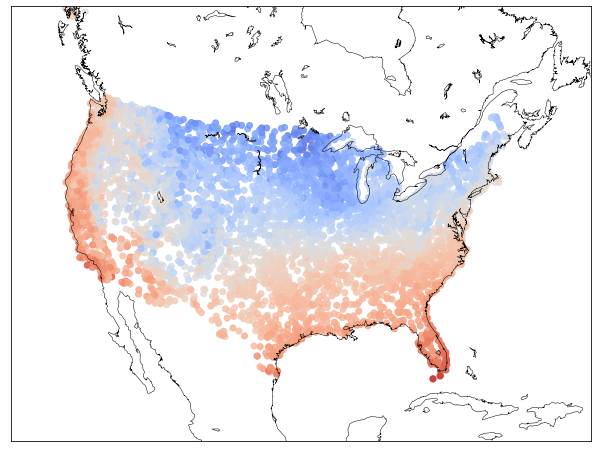

In [6]:
fig = plt.figure(num=None, figsize=(12, 8) ) 

m = Basemap(
    width=6000000,
    height=4500000,
    resolution='l',
    projection='aea',
    lat_1=35.,
    lat_2=45,
    lon_0=-95,
    lat_0=40
    )

m.drawcoastlines(linewidth=0.5)

lon = df_main['LONGITUDE'].to_numpy()
lat = df_main['LATITUDE'].to_numpy()
emnt = df_main['EMNT'].to_numpy()
x, y = m(lon, lat)
m.scatter(x, y, c=emnt, cmap='coolwarm', alpha=0.8)